<a href="https://colab.research.google.com/github/thdnjs0730/2024_Deep/blob/main/%EC%88%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4%ED%95%99%EA%B3%BC_20231596_%EC%B5%9C%EC%86%8C%EC%9B%90_4%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C%EC%A0%9C%EC%B6%9C_SVM(New_%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM(Support Vector Machine)
### SVM New - 활용

#### 1. SVM과 KNN을 사용한 앙상블 모델
- **SVM**과 **KNN**을 결합한 **앙상블 모델**을 생성하여 성능을 개선.
- **소프트 보팅(Soft Voting)**을 사용해 두 모델의 예측 확률을 평균 내어 최종 예측을 만듦.

#### 2. 모델 성능 평가
- **앙상블 모델**의 성능을 **SVM**과 **KNN**의 개별 모델과 비교.
- **정확도(Accuracy)**를 통해 성능을 평가하고, 예측과 실제 값이 **차이나는 부분**을 강조하여 분석.

#### 3. 결정 경계 시각화
- **SVM**과 **KNN**의 **결정 경계(Decision Boundary)**를 시각화하기 위해 **2차원 데이터**를 사용.
- 각 모델이 데이터 포인트를 어떻게 분류하는지 시각적으로 표현.

#### 4. 4차원 데이터 시각화 방법
- **페어플롯(Pair Plot)**을 사용해 각 특성 간의 관계를 시각화하여 **데이터의 분포**를 파악.


### 데이터 불러오기 및 전처리

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import os

# 로깅 제어
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# sklearn에서 제공하는 iris 데이터셋 불러오기
iris = datasets.load_iris()

# 데이터를 DataFrame으로 변환 = 직관적으로 특성 확인 가능
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

### 모델 학습

In [42]:
# 데이터를 훈련 세트과 테스트 세트으로 분리(70:30)
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.3,
                                                    random_state=42)

# 앙상블 시의 성능 향상 확인을 위해 C값과 이웃 수 적당히 조정
# 선형 커널을 사용하는 SVM 모델 초기화
svm_model = svm.SVC(kernel='linear', C=4.0, probability=True) # C=4.0 이상부터 accuracy 1.0 이하로 떨어짐
                                                              # 확률 예측을 위해 probability=True 설정

# KNN 모델 초기화
knn_model = KNeighborsClassifier(n_neighbors=49)

# 소프트 보팅을 사용해 SVM과 KNN 앙상블
# 소프트 보팅? -> 여러 모델의 예측 확률을 평균 내어 최종 예측
voting_clf = VotingClassifier(estimators=[('svm', svm_model), ('knn', knn_model)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=4.0, kernel='linear', probability=True)),
                             ('knn', KNeighborsClassifier(n_neighbors=49))],
                 voting='soft')

### 모델 평가

In [43]:
# y_test와 predictions 차이가 나는 인덱스 강조
def highlight_differences(y_true, y_pred):
    differences = np.where(y_true != y_pred)[0]
    if len(differences) > 0:
        print(f"차이가 나는 인덱스: {differences}")
        print(f"실제 값 (y_test): {y_true[differences]}")
        print(f"예측 값 (predictions): {y_pred[differences]}\n")
    else:
        print("차이가 나는 부분이 없습니다.\n")

# 앙상블 모델 정확도
ensemble_predictions = voting_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model Accuracy:", accuracy)
highlight_differences(y_test, ensemble_predictions)

# 앙상블 전, 개별 모델과의 비교
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

svm_accuracy = metrics.accuracy_score(y_test, svm_predictions)
knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)

print(f"SVM 모델 정확도: {svm_accuracy:.3f}")
highlight_differences(y_test, svm_predictions)
print(f"KNN 모델 정확도: {knn_accuracy:.3f}")
highlight_differences(y_test, knn_predictions)

Ensemble Model Accuracy: 1.0
차이가 나는 부분이 없습니다.

SVM 모델 정확도: 0.978
차이가 나는 인덱스: [8]
실제 값 (y_test): [1]
예측 값 (predictions): [2]

KNN 모델 정확도: 0.933
차이가 나는 인덱스: [ 4 21 40]
실제 값 (y_test): [1 2 2]
예측 값 (predictions): [2 1 1]



### 시각화

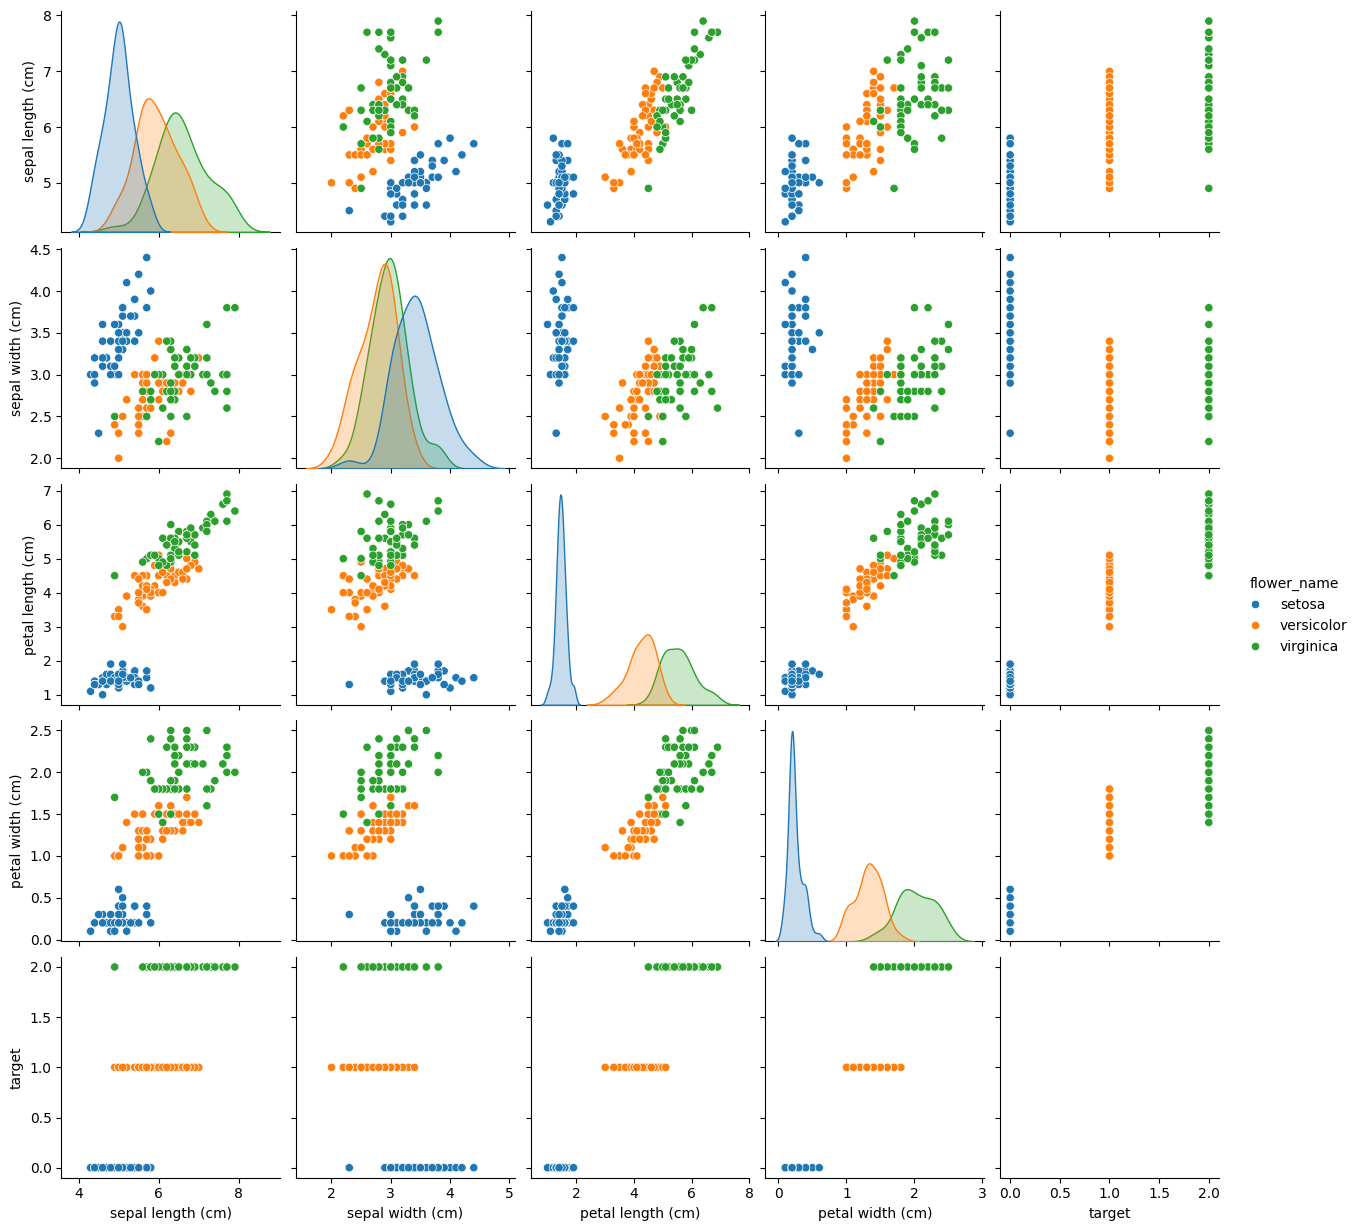

In [44]:
# 네 가지의 특성 모두의 상관관계 시각화
import seaborn as sns
sns.pairplot(df, hue='flower_name', diag_kind='kde')
plt.show()